<a href="https://colab.research.google.com/github/stevesolly97/Comparison-of-ISL-Goalkeepers-using-Python/blob/main/Comparison_of_ISL_Goalkeepers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ISL GK Comparative Analysis

## Import all required libraries

In [1]:
# Data Manipulation libraries:
import io
import pandas as pd
from copy import deepcopy
from google.colab import files
from sklearn.preprocessing import MinMaxScaler

# Plotting libraries:
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots

## Import required data

This code is to import and read a csv file stored in your local system

In [2]:
uploaded = files.upload()

Saving isl_player_final.csv to isl_player_final.csv


In [3]:
isl_df = pd.read_csv(io.BytesIO(uploaded['isl_player_final.csv']))
isl_df.head()

,tour_id,tour_name,id,jersey_no,name,short_name,position_id,position,position_short,team_id,team_name,team_short_name,is_started,is_onbench,is_goalkeeper,is_substitute,minutes_played,bonus_points,injury_minutes_played,actual_minutes_played,goaltenders,events.goals,events.own_goals,events.assists,events.key_passes,events.chances_created,events.shots,events.shots_on_target,events.shots_off_target,events.fouls_committed,events.fouls_suffered,events.yellow_cards,events.red_cards,events.is_second_yellow_card,events.offsides,events.corner_kicks,events.crosses,events.free_kicks,events.throw_in,events.punches,...,events.penalty_kicks.total,events.penalty_kicks.goals,touches.total,touches.total_passes,touches.good_passes,touches.bad_passes,touches.interceptions,touches.blocks,touches.tackles,touches.successful_tackles,touches.unsuccessful_tackles,touches.clearance,touches.saves,touches.take_on_total,touches.take_on_successful,touches.take_on_unsuccessful,touches.last_man_tackle_successful,touches.last_man_tackle_unsuccessful,touches.successful_passes,touches.interceptions_won,touches.aerial_duel.total,touches.aerial_duel.won,touches.aerial_duel.lost,touches.ground_duel.total,touches.ground_duel.won,touches.ground_duel.lost,goaltenders.shots_faced,goaltenders.shots_on_goal_faced,goaltenders.goals_allowed,goaltenders.saves,goaltenders.catches,goaltenders.punches,goaltenders.penalty_kicks.shots_faced,goaltenders.penalty_kicks.goals_allowed,goaltenders.penalty_kicks.saves,country_id,country_name,dob,player_foot,height
0,148,ISL6,1514,3,Asamoah Gyan,Asamoah Gyan,2,Forward,FWD,504,NorthEast United FC,NEUFC,8,4,0,4,592,0,21,613,0,4,0,1,9,10,18,9,9,9,18,2,0,0,6,0,2,2,0,0,...,1,1,252,175,90,85,5,3,5,2,3,11,0,3,0,2,0,0,0,0,36,22,14,1,1,0,0,0,0,0,0,0,0,0,0,43,Ghana,NaN,NaN,NaN
1,148,ISL6,2475,26,Deshorn Dwayne Brown,Deshorn Brown,2,Forward,FWD,656,Bengaluru FC,BFC,6,7,0,7,379,0,6,385,0,3,0,0,3,3,19,8,10,7,5,2,0,0,3,0,3,0,0,0,...,0,0,135,91,49,42,1,2,8,5,3,4,0,17,8,4,0,0,0,0,10,1,9,0,0,0,0,0,0,0,0,0,0,0,0,56,Jamaica,12/22/1990,Right,187.0
2,148,ISL6,2900,9,Amine Chermiti,Amine Chermiti,2,Forward,FWD,506,Mumbai City FC,MCFC,16,6,0,5,1352,0,47,1415,0,6,0,0,16,16,22,10,11,31,26,4,0,0,20,0,13,3,0,0,...,0,0,391,291,162,129,6,6,26,5,21,15,0,14,0,3,0,0,0,0,22,10,12,0,0,0,0,0,0,0,0,0,0,0,0,106,Tunisia,12/26/1987,left,177.0
3,148,ISL6,3753,7,Francisco Medina Luna,Piti,3,Midfielder,MF,1159,Jamshedpur FC,JFC,6,5,0,5,416,0,0,421,0,1,0,2,7,9,16,7,6,6,19,1,0,0,0,14,10,22,0,0,...,1,1,247,207,133,74,5,5,9,4,5,0,0,19,11,4,0,0,0,0,4,1,3,0,0,0,0,0,0,0,0,0,0,0,0,19,Spain,5/26/1981,left,179.0
4,148,ISL6,3809,4,Rafael Lopez Gomez,Rafael Lopez Gomez,1,Defender,DEF,1536,Hyderabad FC,HFC,6,5,0,4,395,0,21,410,0,0,0,0,3,3,2,0,2,6,6,0,0,0,0,0,0,4,3,0,...,0,0,217,141,111,30,8,11,30,7,23,16,0,17,2,0,0,0,0,0,5,3,2,0,0,0,0,0,0,0,0,0,0,0,0,19,Spain,4/9/1985,right,183.0


## Data Preparation

Explore and prepare your data for the required analysis to be performed. Eg., we are going to analyse goalkeepers, so we need to filter out and remove all the data from positions other than GK.

In [4]:
# Check all the unique positions in the data:
isl_df.drop_duplicates(subset=["position_id"])[["position_id", "position"]]

,position_id,position
0,2,Forward
3,3,Midfielder
4,1,Defender
9,4,Goalkeeper


### Slicing and Storing for only GK data

Pro-tip: It is an expert practice to always use [deepcopy](https://www.geeksforgeeks.org/copy-python-deep-copy-shallow-copy/) to save sliced dataframes in a new variable

In [5]:
# Slice (Filter) dataframe only to retain information about GKs:
isl_df[isl_df["position_id"] == 4]

,tour_id,tour_name,id,jersey_no,name,short_name,position_id,position,position_short,team_id,team_name,team_short_name,is_started,is_onbench,is_goalkeeper,is_substitute,minutes_played,bonus_points,injury_minutes_played,actual_minutes_played,goaltenders,events.goals,events.own_goals,events.assists,events.key_passes,events.chances_created,events.shots,events.shots_on_target,events.shots_off_target,events.fouls_committed,events.fouls_suffered,events.yellow_cards,events.red_cards,events.is_second_yellow_card,events.offsides,events.corner_kicks,events.crosses,events.free_kicks,events.throw_in,events.punches,...,events.penalty_kicks.total,events.penalty_kicks.goals,touches.total,touches.total_passes,touches.good_passes,touches.bad_passes,touches.interceptions,touches.blocks,touches.tackles,touches.successful_tackles,touches.unsuccessful_tackles,touches.clearance,touches.saves,touches.take_on_total,touches.take_on_successful,touches.take_on_unsuccessful,touches.last_man_tackle_successful,touches.last_man_tackle_unsuccessful,touches.successful_passes,touches.interceptions_won,touches.aerial_duel.total,touches.aerial_duel.won,touches.aerial_duel.lost,touches.ground_duel.total,touches.ground_duel.won,touches.ground_duel.lost,goaltenders.shots_faced,goaltenders.shots_on_goal_faced,goaltenders.goals_allowed,goaltenders.saves,goaltenders.catches,goaltenders.punches,goaltenders.penalty_kicks.shots_faced,goaltenders.penalty_kicks.goals_allowed,goaltenders.penalty_kicks.saves,country_id,country_name,dob,player_foot,height
9,148,ISL6,3997,1,Amrinder Ranjit Singh,Amrinder Singh,4,Goalkeeper,GK,506,Mumbai City FC,MCFC,18,0,18,0,1620,0,89,1725,0,0,0,0,0,0,0,0,0,0,2,2,0,0,0,0,0,62,0,24,...,0,0,601,261,167,94,0,0,0,0,0,55,49,26,0,0,0,0,0,0,1,1,0,0,0,0,165,69,29,42,30,0,3,3,0,1,India,5/27/1993,Right,183.0
22,148,ISL6,9770,13,Francisco Ramos Dorronsoro Sanchez,Francisco Dorronsoro,4,Goalkeeper,GK,1499,Odisha FC,OFC,10,7,10,1,879,0,42,926,0,0,0,0,0,0,0,0,0,2,3,4,0,0,0,0,0,18,1,9,...,0,0,340,142,107,35,1,1,0,0,0,33,23,20,3,0,0,0,0,0,0,0,0,0,0,0,87,34,17,22,29,0,6,4,1,19,Spain,5/22/1985,NaN,180.0
24,148,ISL6,10254,33,Laxmikant Kattimani,Laxmikant Kattimani,4,Goalkeeper,GK,1536,Hyderabad FC,HFC,6,12,6,0,540,0,26,571,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,8,0,8,...,0,0,193,62,44,18,1,0,0,0,0,16,24,6,0,0,0,0,0,0,0,0,0,0,0,0,71,37,13,24,25,0,2,2,0,1,India,5/3/1989,Right,183.0
33,148,ISL6,10649,24,Subhasish Roy Chowdhury,Subhasish Roy,4,Goalkeeper,GK,504,NorthEast United FC,NEUFC,15,1,15,0,1350,0,72,1431,0,0,0,0,1,1,0,0,0,1,1,5,0,0,0,0,0,32,0,28,...,0,0,453,139,77,62,1,0,0,0,0,31,57,22,0,0,0,0,0,0,0,0,0,0,0,0,165,76,21,55,42,0,3,2,1,1,India,9/27/1986,Right,186.0
37,148,ISL6,10677,40,Kunzang Bhutia,Kunzang Bhutia,4,Goalkeeper,GK,1536,Hyderabad FC,HFC,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,India,1/3/1994,Right,186.0
38,148,ISL6,10682,13,Tumbirumbu Paramba Rehenesh,TP Rehenesh,4,Goalkeeper,GK,498,Kerala Blasters FC,KBFC,13,0,13,0,1170,0,63,1247,0,0,0,0,1,1,0,0,0,0,2,0,0,0,0,0,0,40,0,6,...,0,0,448,228,180,48,0,0,1,0,1,41,23,41,2,0,0,0,0,0,0,0,0,0,0,0,88,47,25,23,20,0,4,4,0,1,India,2/13/1993,Right,178.0
48,148,ISL6,10717,29,Arindam Bhattacharja,Arindam Bhattacharja,4,Goalkeeper,GK,499,ATK FC,ATKFC,20,1,20,0,1800,0,91,1918,0,0,0,0,0,0,0,0,0,0,4,3,0,0,0,0,0,53,0,35,...,0,0,548,152,70,82,0,0,0,0,0,45,53,30,0,0,0,0,0,0,0,0,0,0,0,0,194,70,17,53,37,0,2,2,0,1,India,5/20/1989,Right,189.0
49,148,ISL6,10767,1,Subrata Paul,Subrata Paul,4,Goalkeeper,GK,1159,Jamshedpur FC,JFC,15,3,15,0,1350,0,77,1438,0,0,0,0,0,0,0,0,0,0,5,1,0,0,0,0,0,23,0,16,...,0,0,389,147,104,43,0,0,0,0,0,31,52,15,0,0,0,0,0,0,0,0,0,0,0,0,141,70,26,44,38,0,3,3,0,1,India,12/24/1986,Right,185.0
52,148,ISL6,13366,1,Karanjit Singh,Karanjit Singh,4,Goalkeeper,GK,505,Chennaiyin FC,CFC,1,15,1,0,90,0,5,95,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,5,...,0,0,40,11,6,5,0,0,0,0,0,4,6,5,0,0,0,0,0,0,0,0,0,0,0,0,13,8,2,6,6,0,1,1,0,1,India,1/

In [6]:
# Save the sliced dataframe in a variable for further use:
gk_df = deepcopy(isl_df[isl_df["position_id"] == 4])

In [7]:
gk_df.columns.values

array(['tour_id', 'tour_name', 'id', 'jersey_no', 'name', 'short_name',
       'position_id', 'position', 'position_short', 'team_id',
       'team_name', 'team_short_name', 'is_started', 'is_onbench',
       'is_goalkeeper', 'is_substitute', 'minutes_played', 'bonus_points',
       'injury_minutes_played', 'actual_minutes_played', 'goaltenders',
       'events.goals', 'events.own_goals', 'events.assists',
       'events.key_passes', 'events.chances_created', 'events.shots',
       'events.shots_on_target', 'events.shots_off_target',
       'events.fouls_committed', 'events.fouls_suffered',
       'events.yellow_cards', 'events.red_cards',
       'events.is_second_yellow_card', 'events.offsides',
       'events.corner_kicks', 'events.crosses', 'events.free_kicks',
       'events.throw_in', 'events.punches', 'events.catches',
       'events.goals_conceded', 'events.clean_sheet', 'events.cleansheet',
       'events.fantasy_assists', 'events.penalties_saved',
       'events.penalties_earn

### Exploration of GK data

#### Meta-Level information

In [8]:
# First thing to always do before starting analysis is to see generic meta-level information about your dataframe:
gk_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59 entries, 9 to 557
Data columns (total 93 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   tour_id                                  59 non-null     int64  
 1   tour_name                                59 non-null     object 
 2   id                                       59 non-null     int64  
 3   jersey_no                                59 non-null     int64  
 4   name                                     59 non-null     object 
 5   short_name                               59 non-null     object 
 6   position_id                              59 non-null     int64  
 7   position                                 59 non-null     object 
 8   position_short                           59 non-null     object 
 9   team_id                                  59 non-null     int64  
 10  team_name                                59 non-nul

#### Basic Statistical exploration

In [9]:
# After you have fairly had an overview of your dataframe, next step is to look at some basic statistics for numerical columns:
gk_df.describe().round(1)

,tour_id,id,jersey_no,position_id,team_id,is_started,is_onbench,is_goalkeeper,is_substitute,minutes_played,bonus_points,injury_minutes_played,actual_minutes_played,goaltenders,events.goals,events.own_goals,events.assists,events.key_passes,events.chances_created,events.shots,events.shots_on_target,events.shots_off_target,events.fouls_committed,events.fouls_suffered,events.yellow_cards,events.red_cards,events.is_second_yellow_card,events.offsides,events.corner_kicks,events.crosses,events.free_kicks,events.throw_in,events.punches,events.catches,events.goals_conceded,events.clean_sheet,events.cleansheet,events.fantasy_assists,events.penalties_saved,events.penalties_earned,...,events.freekicks_earned_goal,events.blocked_shots,events.defensive_blocked_shots,events.penalty_kicks.total,events.penalty_kicks.goals,touches.total,touches.total_passes,touches.good_passes,touches.bad_passes,touches.interceptions,touches.blocks,touches.tackles,touches.successful_tackles,touches.unsuccessful_tackles,touches.clearance,touches.saves,touches.take_on_total,touches.take_on_successful,touches.take_on_unsuccessful,touches.last_man_tackle_successful,touches.last_man_tackle_unsuccessful,touches.successful_passes,touches.interceptions_won,touches.aerial_duel.total,touches.aerial_duel.won,touches.aerial_duel.lost,touches.ground_duel.total,touches.ground_duel.won,touches.ground_duel.lost,goaltenders.shots_faced,goaltenders.shots_on_goal_faced,goaltenders.goals_allowed,goaltenders.saves,goaltenders.catches,goaltenders.punches,goaltenders.penalty_kicks.shots_faced,goaltenders.penalty_kicks.goals_allowed,goaltenders.penalty_kicks.saves,country_id,height
count,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,...,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,43.0
mean,178.2,30083.8,19.7,4.0,891.1,7.1,7.3,7.3,0.3,641.7,0.0,40.1,684.3,0.0,0.0,0.0,0.0,0.2,0.2,0.0,0.0,0.0,0.3,1.5,0.6,0.0,0.0,0.0,0.0,0.0,16.4,0.0,12.2,15.4,9.9,0.0,3.2,0.0,0.2,0.0,...,0.0,0.0,0.0,0.0,0.0,217.8,86.1,53.2,32.9,0.1,0.3,0.4,0.1,0.3,16.6,19.3,5.7,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64.9,28.5,10.0,18.8,14.5,0.0,1.3,1.1,0.2,1.3,145.0
std,27.0,22744.9,15.9,0.0,471.7,8.0,6.9,8.0,0.4,719.8,0.0,46.0,767.9,0.0,0.0,0.2,0.2,0.6,0.6,0.0,0.0,0.0,0.6,2.0,1.2,0.1,0.0,0.0,0.0,0.0,21.5,0.1,15.4,17.0,9.9,0.0,2.9,0.2,0.5,0.0,...,0.0,0.0,0.0,0.0,0.0,248.5,104.0,67.2,40.9,0.4,0.6,0.7,0.4,0.6,20.2,22.4,11.4,0.5,0.0,0.0,0.0,0.0,0.0,0.1,0.1,0.0,0.1,0.1,0.0,72.8,31.8,10.9,21.8,16.3,0.0,1.9,1.5,0.5,2.3,75.6
min,148.0,3997.0,1.0,4.0,496.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
25%,148.0,13366.0,1.0,4.0,504.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,176.0
50%,202.0,26757.0,23.0,4.0,656.0,3.0,5.0,3.0,0.0,218.0,0.0,14.0,231.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,6.0,6.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,54.0,21.0,14.0,9.0,0.0,0.0,0.0,0.0,0.0,5.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,9.0,6.0,6.0,6.0,0.0,0.0,0.0,0.0,1.0,182.0
75%,202.0,35262.0,31.0,4.0,1329.0,14.5,13.5,15.0,0.5,1297.5,0.0,80.0,1391.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,32.0,0.0,20.0,31.5,18.0,0.0,4.5,0.0,0.0,0.0,...,0.0,0.0

#### Display all columns
Pro-tip: If all the columns of a datarame are not displayed, use the pandas set_option function to display any number of columns you wish.

In [10]:
# We will set display max columns to 85 since we have 83 columns in our gk_df:
pd.set_option("display.max_columns", 85)

In [11]:
# Let's run the describe function again to see the change:
gk_df.describe().round(1)

,tour_id,id,jersey_no,position_id,team_id,is_started,is_onbench,is_goalkeeper,is_substitute,minutes_played,bonus_points,injury_minutes_played,actual_minutes_played,goaltenders,events.goals,events.own_goals,events.assists,events.key_passes,events.chances_created,events.shots,events.shots_on_target,events.shots_off_target,events.fouls_committed,events.fouls_suffered,events.yellow_cards,events.red_cards,events.is_second_yellow_card,events.offsides,events.corner_kicks,events.crosses,events.free_kicks,events.throw_in,events.punches,events.catches,events.goals_conceded,events.clean_sheet,events.cleansheet,events.fantasy_assists,events.penalties_saved,events.penalties_earned,events.penalties_conceded,events.penalties_missed,events.freekicks_conceded_goal,events.freekicks_earned_goal,events.blocked_shots,events.defensive_blocked_shots,events.penalty_kicks.total,events.penalty_kicks.goals,touches.total,touches.total_passes,touches.good_passes,touches.bad_passes,touches.interceptions,touches.blocks,touches.tackles,touches.successful_tackles,touches.unsuccessful_tackles,touches.clearance,touches.saves,touches.take_on_total,touches.take_on_successful,touches.take_on_unsuccessful,touches.last_man_tackle_successful,touches.last_man_tackle_unsuccessful,touches.successful_passes,touches.interceptions_won,touches.aerial_duel.total,touches.aerial_duel.won,touches.aerial_duel.lost,touches.ground_duel.total,touches.ground_duel.won,touches.ground_duel.lost,goaltenders.shots_faced,goaltenders.shots_on_goal_faced,goaltenders.goals_allowed,goaltenders.saves,goaltenders.catches,goaltenders.punches,goaltenders.penalty_kicks.shots_faced,goaltenders.penalty_kicks.goals_allowed,goaltenders.penalty_kicks.saves,country_id,height
count,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,43.0
mean,178.2,30083.8,19.7,4.0,891.1,7.1,7.3,7.3,0.3,641.7,0.0,40.1,684.3,0.0,0.0,0.0,0.0,0.2,0.2,0.0,0.0,0.0,0.3,1.5,0.6,0.0,0.0,0.0,0.0,0.0,16.4,0.0,12.2,15.4,9.9,0.0,3.2,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,217.8,86.1,53.2,32.9,0.1,0.3,0.4,0.1,0.3,16.6,19.3,5.7,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64.9,28.5,10.0,18.8,14.5,0.0,1.3,1.1,0.2,1.3,145.0
std,27.0,22744.9,15.9,0.0,471.7,8.0,6.9,8.0,0.4,719.8,0.0,46.0,767.9,0.0,0.0,0.2,0.2,0.6,0.6,0.0,0.0,0.0,0.6,2.0,1.2,0.1,0.0,0.0,0.0,0.0,21.5,0.1,15.4,17.0,9.9,0.0,2.9,0.2,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,248.5,104.0,67.2,40.9,0.4,0.6,0.7,0.4,0.6,20.2,22.4,11.4,0.5,0.0,0.0,0.0,0.0,0.0,0.1,0.1,0.0,0.1,0.1,0.0,72.8,31.8,10.9,21.8,16.3,0.0,1.9,1.5,0.5,2.3,75.6
min,148.0,3997.0,1.0,4.0,496.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
25%,148.0,13366.0,1.0,4.0,504.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,176.0
50%,202.0,26757.0,23.0,4.0,656.0,3.0,5.0,3.0,0.0,218.0,0.0,14.0,231.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,6.0,6.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54.0,21.0,14.0,9.0,0.0,0.0,0.0,0.0,0.0,5.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,9.0,6.0,6.0,6.0,0.0,0.0,0.0,0.0,1.0,182.0
75%,202.0,35262.0,31.0,4.0,1329.0,14.5,13.5,15.0,0.5,1297.5,0.0,80.0,13

#### Cleansheets per season

For this exploration, we will use, both, a numerical and a graphical approach
1. Numerical --> using [`groupby()`](https://pandas.pydata.org/docs/user_guide/groupby.html)
1. Graphical --> using [`seaborn.barplot`](https://seaborn.pydata.org/generated/seaborn.barplot.html) and [`px.bar`](https://plotly.com/python-api-reference/generated/plotly.express.bar)

In [12]:
# Numerical exploration:
gk_df.groupby(["short_name", "tour_name"])["events.cleansheet"].sum()

short_name              tour_name
Aditya Patra            ISL6          1
Albino Gomes            ISL7          3
Amrinder Singh          ISL6          2
                        ISL7         10
Ankit Bhuyan            ISL6          0
Arindam Bhattacharja    ISL6          7
                        ISL7         10
Arshdeep Singh          ISL6          3
                        ISL7          1
Avilash Paul            ISL7          8
Bilal Husain Khan       ISL6          2
                        ISL7          0
Debjit Majumder         ISL7          3
Dheeraj Singh           ISL6          7
                        ISL7          4
Francisco Dorronsoro    ISL6          2
Gurmeet                 ISL7          6
Gurpreet Singh Sandhu   ISL6          7
                        ISL7          4
Kamaljit Singh          ISL6          0
                        ISL7          1
Karanjit Singh          ISL6          2
                        ISL7          6
Kunzang Bhutia          ISL6          0
Lalbia

PS: The problem with numerical exploration is that you will have to look a lot for patterns

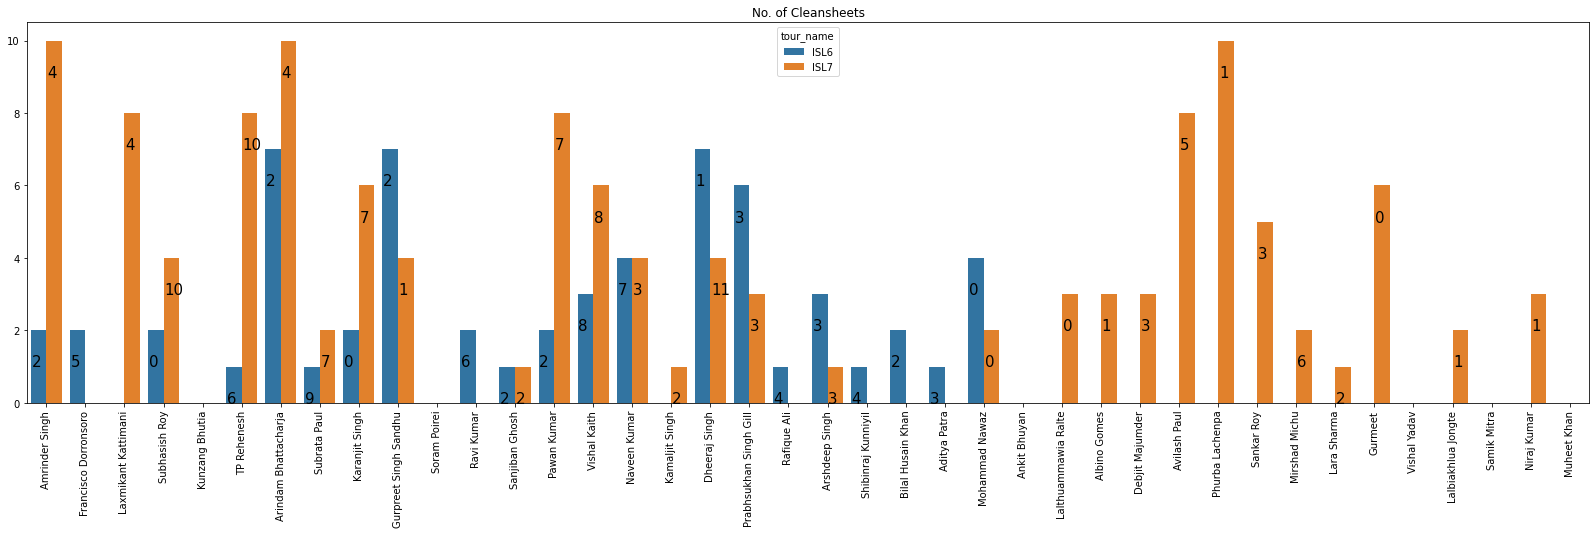

In [13]:
# Using seaborn:
plt.figure(figsize=(28, 7))
ax = sns.barplot(x="short_name", y="events.cleansheet", hue="tour_name", data=gk_df)
plt.xticks(rotation=90)
plt.title("No. of Cleansheets")
plt.ylabel("")
plt.xlabel("")
# Let's add some labels to the bars:
for p, label in zip(ax.patches, isl_df["events.cleansheet"].values):
    ax.annotate(label, (p.get_x() + 0.02, p.get_height() - 1), size=15)

PS: Seaborn does easily solve the issue with numerical exploration, however, quite a bit of lines of code are required. This can be resolved and made more efficient with `plotly.express`

In [14]:
# Using plotly.express:
fig = px.bar(x="short_name", y="events.cleansheet", barmode="group", data_frame=gk_df,
             color="tour_name", text="events.cleansheet", title="No. of Cleansheets (per season)",
             labels={"short_name": "", "events.cleansheet": "", "tour_name": "tour"})
fig.update_traces(textfont={"color": "white"})

PS: `plotly.express` gives the most efficient and easiest way to build a bar chart in python notebooks.

You can use the same technique to explore other metrics.

### Analysing GK metrics using `plotly.express.bar`

NOTE: In this section, we will only consider GKs who have played more than 180 mins (equivalent to 2 matches) to de-clutter the plot.

#### Slice the dataframe w.r.t. minutes criteria

In [15]:
# Again slice the GK dataframe to include players who have played more than 180 mins in a season:
gk_df_mins_df = deepcopy(gk_df[gk_df["actual_minutes_played"] > 180])

Pro-tip: We slice it and assign it to a variable because it will be very efficient if you change the criteria from 180 to some other number. In that case, you will only have to change it in one place and just re-run all the plot cells to get updated plots.

#### Goals Conceded per season vs minutes played

In this part, we will have a look at goals conceded first. However, looking only at this might be biased since every GK will have played for a different amount of time. So, we will compare it will minutes played.

In [16]:
# Plotting goals conceded per season:
fig = px.bar(x="short_name", y="events.goals_conceded", data_frame=gk_df_mins_df,
             color="tour_name", text="events.goals_conceded", barmode="group",
             title="Total Goals Conceded (per season)",
             labels={"short_name": "", "events.goals_conceded": "", "tour_name": "tour"})
fig.update_traces(textfont={"color": "white"})

In [17]:
# Plotting minutes played per season:
fig = px.bar(x="short_name", y="actual_minutes_played", data_frame=gk_df_mins_df,
             color="tour_name", text="actual_minutes_played", barmode="group",
             title="Total Minutes Played (per season)",
             labels={"short_name": "", "actual_minutes_played": "", "tour_name": "tour"})
fig.update_traces(textfont={"color": "white"})

#### Goals Conceded vs mins played using subplots

In [18]:
# Create an empty subplot:
fig = make_subplots(rows=2, cols=1,
                    shared_xaxes=True,
                    vertical_spacing=0.1,
                    subplot_titles=("Goals Conceded (per season)","Mins Played (per season)"))
# Add bar plot for goals conceded in 1st subplot:
fig.add_trace(go.Bar(x=gk_df_mins_df["short_name"],
                     y=gk_df_mins_df["events.goals_conceded"],
                     text=gk_df_mins_df["events.goals_conceded"],
                     textposition="inside",
                     name="Total Conceded"),
              row=1, col=1)
# Add bar plot for minutes played in 2nd subplot:
fig.add_trace(go.Bar(x=gk_df_mins_df["short_name"],
                     y=gk_df_mins_df["actual_minutes_played"],
                     text=gk_df_mins_df["actual_minutes_played"],
                     textposition="inside",
                     insidetextfont={"color": "white"},
                     name="Total Minutes"),
              row=2, col=1)
# Additional plot parameters:
fig.update_layout(height=600, width=1500,
                  showlegend=True)
fig.show()

In [19]:
# You can confirm the numbers in the graph by checking on the data for a few random GKs:
gk_df[gk_df["short_name"].str.contains("Nawaz")]

,tour_id,tour_name,id,jersey_no,name,short_name,position_id,position,position_short,team_id,team_name,team_short_name,is_started,is_onbench,is_goalkeeper,is_substitute,minutes_played,bonus_points,injury_minutes_played,actual_minutes_played,goaltenders,events.goals,events.own_goals,events.assists,events.key_passes,events.chances_created,events.shots,events.shots_on_target,events.shots_off_target,events.fouls_committed,events.fouls_suffered,events.yellow_cards,events.red_cards,events.is_second_yellow_card,events.offsides,events.corner_kicks,events.crosses,events.free_kicks,events.throw_in,events.punches,events.catches,events.goals_conceded,...,events.blocked_shots,events.defensive_blocked_shots,events.penalty_kicks.total,events.penalty_kicks.goals,touches.total,touches.total_passes,touches.good_passes,touches.bad_passes,touches.interceptions,touches.blocks,touches.tackles,touches.successful_tackles,touches.unsuccessful_tackles,touches.clearance,touches.saves,touches.take_on_total,touches.take_on_successful,touches.take_on_unsuccessful,touches.last_man_tackle_successful,touches.last_man_tackle_unsuccessful,touches.successful_passes,touches.interceptions_won,touches.aerial_duel.total,touches.aerial_duel.won,touches.aerial_duel.lost,touches.ground_duel.total,touches.ground_duel.won,touches.ground_duel.lost,goaltenders.shots_faced,goaltenders.shots_on_goal_faced,goaltenders.goals_allowed,goaltenders.saves,goaltenders.catches,goaltenders.punches,goaltenders.penalty_kicks.shots_faced,goaltenders.penalty_kicks.goals_allowed,goaltenders.penalty_kicks.saves,country_id,country_name,dob,player_foot,height
218,148,ISL6,55648,13,Mohammad Nawaz,Mohammad Nawaz,4,Goalkeeper,GK,496,FC Goa,FCG,20,0,20,0,1800,0,102,1916,0,0,0,0,1,1,0,0,0,1,5,2,0,0,0,0,0,16,0,34,41,24,...,0,0,0,0,632,280,239,41,1,1,1,0,1,52,42,36,0,0,0,0,0,0,0,0,0,0,0,0,169,71,29,42,40,0,0,0,0,1,India,1/21/2000,right,0.0
482,202,ISL7,55648,13,Mohammad Nawaz,Mohammad Nawaz,4,Goalkeeper,GK,496,FC Goa,FCG,10,4,10,0,900,0,65,965,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,4,0,10,16,11,...,0,0,0,0,296,151,102,49,0,0,0,0,0,22,20,1,1,0,0,0,0,0,0,0,0,0,0,0,76,30,11,19,13,0,3,3,0,1,India,1/21/2000,right,0.0


### Comparison Analysis - Bubble Charts

In this sections, we will compare more than two metrics in a given graph. We will use some advanced graphs in this section.

#### Punches vs Catches

It would be quite something to analyse what is the ratio of catches as compared to punches for each GK and also present it in a comparative manner. Let's dive in!

In [20]:
# Let's only consider players who have played atleast 900 mins (equivalent of 10 matches):
gk_df_mins_df = deepcopy(gk_df_mins_df[gk_df_mins_df["actual_minutes_played"] > 180])

PS: This will focus our analysis on GKs who are majorly starters in their respective teams.

In [21]:
# Simple punches vs catches:
fig = px.scatter(y="events.catches", x="events.punches", data_frame=gk_df_mins_df,
                 hover_name="team_short_name", text="short_name", symbol="tour_name",
                 labels={"events.catches": "Catches", "events.punches": "Punches", "tour_name": "tour"},
                 opacity=.8)

fig.add_trace(go.Scatter(x=gk_df_mins_df["events.punches"],
                         y=[gk_df_mins_df["events.catches"].mean()]*len(gk_df_mins_df),
                         name="Avg. catches"))
fig.add_trace(go.Scatter(x=[gk_df_mins_df["events.punches"].mean()]*len(gk_df_mins_df),
                         y=gk_df_mins_df["events.catches"],
                         name="Avg. punches"))
# Right top quadrant:
fig.add_annotation(x=gk_df_mins_df["events.punches"].describe(percentiles=[.9])["90%"],
                   y=gk_df_mins_df["events.catches"].describe(percentiles=[.9])["90%"],
            text="High Punch-Catch Zone",
            showarrow=False, yshift=50, font={"size": 20})

fig.add_annotation(x=gk_df_mins_df["events.punches"].describe(percentiles=[.9])["90%"],
                   y=gk_df_mins_df["events.catches"].describe(percentiles=[.10])["10%"],
            text="High Punch Low Catch Zone",
            showarrow=False, font={"size": 20})
# Left bottom quadrant:
fig.add_annotation(x=gk_df_mins_df["events.punches"].describe(percentiles=[.15])["15%"],
                   y=gk_df_mins_df["events.catches"].describe(percentiles=[.10])["10%"],
            text="Low Punch-Catch Zone",
            showarrow=False, font={"size": 20})
# Left top quadrant:
fig.add_annotation(x=gk_df_mins_df["events.punches"].describe(percentiles=[.15])["15%"],
                   y=gk_df_mins_df["events.catches"].describe(percentiles=[.9])["90%"],
            text="Low Punch High Catch Zone",
            showarrow=False, yshift=50, font={"size": 20})
# Additional plot parameters:
fig.update_traces(textposition='top center', textfont_size=10, marker=dict(size=10))
fig.update_layout(showlegend=True, height=800, width=1500)

##### Per90 comparison

In [22]:
# Create per 90 stats:
gk_df_mins_df["events.catchesPer90"] = gk_df_mins_df["events.catches"].divide(gk_df_mins_df["actual_minutes_played"]).multiply(90)
gk_df_mins_df["events.punchesPer90"] = gk_df_mins_df["events.punches"].divide(gk_df_mins_df["actual_minutes_played"]).multiply(90)

In [23]:
x_col = "events.punchesPer90"
y_col = "events.catchesPer90"
hoverName = "team_short_name"
markerLabelText = "short_name"
markerSymbol="tour_name"

In [24]:
# Simple punches vs catches per 90:
fig = px.scatter(y=y_col, x=x_col, data_frame=gk_df_mins_df,
                 hover_name=hoverName, text=markerLabelText, symbol=markerSymbol,
                 labels={y_col: "Catches", x_col: "Punches", markerSymbol: "tour"},
                 opacity=.8)

fig.add_trace(go.Scatter(x=gk_df_mins_df[x_col],
                         y=[gk_df_mins_df[y_col].mean()]*len(gk_df_mins_df),
                         name="Avg. catches"))
fig.add_trace(go.Scatter(x=[gk_df_mins_df[x_col].mean()]*len(gk_df_mins_df),
                         y=gk_df_mins_df[y_col],
                         name="Avg. punches"))
# Right top quadrant:
fig.add_annotation(x=gk_df_mins_df[x_col].max(),
                   y=gk_df_mins_df[y_col].max(),
            text="High Punch-Catch Zone",
            showarrow=False, xshift=-150, yshift=-50, font={"size": 20})

fig.add_annotation(x=gk_df_mins_df[x_col].max(),
                   y=gk_df_mins_df[y_col].min(),
            text="High Punch Low Catch Zone",
            showarrow=False, xshift=-150, font={"size": 20})
# Left bottom quadrant:
fig.add_annotation(x=gk_df_mins_df[x_col].min(),
                   y=gk_df_mins_df[y_col].min(),
            text="Low Punch-Catch Zone",
            showarrow=False, xshift=150, font={"size": 20})
# Left top quadrant:
fig.add_annotation(x=gk_df_mins_df[x_col].min(),
                   y=gk_df_mins_df[y_col].max(),
            text="Low Punch High Catch Zone",
            showarrow=False, xshift=150, yshift=-50, font={"size": 20})
# Additional plot parameters:
fig.update_traces(textposition='top center', textfont_size=10, marker=dict(size=10))
fig.update_layout(showlegend=True, height=800, width=1500)

##### Per90 comparison with other metrics

In this, we will use metrics like SavesPer90, CleansheetsPer90 to infuse additional information into a single graph

In [25]:
# Calculate per90 stats:
gk_df_mins_df["goaltenders.savesPer90"] = gk_df_mins_df["goaltenders.saves"].divide(gk_df_mins_df["actual_minutes_played"]).multiply(90)
gk_df_mins_df["events.cleansheetPer90"] = gk_df_mins_df["events.cleansheet"].divide(gk_df_mins_df["actual_minutes_played"]).multiply(90)

In [26]:
# Assign column names to variables for ease of modification:
markerSize = "goaltenders.savesPer90"
markerColor = "events.cleansheetPer90"

In [27]:
# Punches vs catches with saves and cleansheets:
fig = px.scatter(y=y_col, x=x_col, data_frame=gk_df_mins_df,
                 size=markerSize, color=markerColor, opacity=.8,
                 hover_name=hoverName, text=markerLabelText, symbol=markerSymbol,
                 labels={y_col: "Catches", x_col: "Punches", markerSymbol: "tour"})
# Add average lines for punches and catches:
fig.add_trace(go.Scatter(x=gk_df_mins_df[x_col],
                         y=[gk_df_mins_df[y_col].mean()]*len(gk_df_mins_df),
                         name="Avg. catches"))
fig.add_trace(go.Scatter(x=[gk_df_mins_df[x_col].mean()]*len(gk_df_mins_df),
                         y=gk_df_mins_df[y_col],
                         name="Avg. punches"))
# Annotations for each quadrant
# Right top quadrant #
fig.add_annotation(x=gk_df_mins_df[x_col].max(),
                   y=gk_df_mins_df[y_col].max(),
            text="High Punch-Catch Zone",
            showarrow=False, xshift=-150, yshift=-50, font={"size": 20})
# Right bottom quadrant #
fig.add_annotation(x=gk_df_mins_df[x_col].max(),
                   y=gk_df_mins_df[y_col].min(),
            text="High Punch Low Catch Zone",
            showarrow=False, xshift=-150, font={"size": 20})
# Left bottom quadrant #
fig.add_annotation(x=gk_df_mins_df[x_col].min(),
                   y=gk_df_mins_df[y_col].min(),
            text="Low Punch-Catch Zone",
            showarrow=False, xshift=150, font={"size": 20})
# Left top quadrant #
fig.add_annotation(x=gk_df_mins_df[x_col].min(),
                   y=gk_df_mins_df[y_col].max(),
            text="Low Punch High Catch Zone",
            showarrow=False, xshift=150, yshift=-50, font={"size": 20})
# Additional plot parameters:
fig.update_traces(textposition='top center', textfont_size=10)
fig.update_layout(showlegend=False, height=800, width=1500)

fig.show()

### Comparison Analysis - Radar Plots

In this sections, we will compare more than two metrics in a given graph. We will use Radar graphs in this section.

So far, we managed to display and hence, analyse upto 4 metrics together. With Radar plots, the number of metrics to be displayed can rise to any number you want (within reason). This makes Comparison Analysis more efficient but also limits the no. of players to 2-3.

#### Know Your Data (KYD)
NOTE: In this data, any metric that starts with *goaltenders* is for when the ball is directed towards the goal.

For eg., `goaltenders.catches` are the catches made by the GK when the ball was heading towards the goals and `events.catches` are those made from either a cross or a pass i.e. the ball was not heading directly towards the goal.

To quickly check the difference, you can use a [combination of `groupby` and `agg` functions of pandas](https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.core.groupby.DataFrameGroupBy.agg.html)

In [28]:
# To check the difference in values for goaltenders and events catches:
gk_df_mins_df.groupby("id").agg({"short_name": "first", 'goaltenders.catches': "sum", 'events.catches': 'sum'})

,short_name,goaltenders.catches,events.catches
id,,,
3997,Amrinder Singh,60,66
9770,Francisco Dorronsoro,29,31
10254,Laxmikant Kattimani,48,48
10649,Subhasish Roy,79,83
10682,TP Rehenesh,51,55
10717,Arindam Bhattacharja,76,78
10767,Subrata Paul,54,57
13370,Gurpreet Singh Sandhu,91,96
19153,Albino Gomes,46,48


#### Consolidate numbers for ISL6 and ISL7 for every player

Only the columns to be used in the radar need to be consolidated. This is not a necessary step, but some columns may cause problems and it would be extra work to handle those errors.

In [29]:
# Let's display all the columns so that we enter the correct column names:
gk_df_mins_df.columns.values

array(['tour_id', 'tour_name', 'id', 'jersey_no', 'name', 'short_name',
       'position_id', 'position', 'position_short', 'team_id',
       'team_name', 'team_short_name', 'is_started', 'is_onbench',
       'is_goalkeeper', 'is_substitute', 'minutes_played', 'bonus_points',
       'injury_minutes_played', 'actual_minutes_played', 'goaltenders',
       'events.goals', 'events.own_goals', 'events.assists',
       'events.key_passes', 'events.chances_created', 'events.shots',
       'events.shots_on_target', 'events.shots_off_target',
       'events.fouls_committed', 'events.fouls_suffered',
       'events.yellow_cards', 'events.red_cards',
       'events.is_second_yellow_card', 'events.offsides',
       'events.corner_kicks', 'events.crosses', 'events.free_kicks',
       'events.throw_in', 'events.punches', 'events.catches',
       'events.goals_conceded', 'events.clean_sheet', 'events.cleansheet',
       'events.fantasy_assists', 'events.penalties_saved',
       'events.penalties_earn

In [30]:
per90Cols = ['actual_minutes_played', 'events.punches', 'events.catches', 'events.goals_conceded', 'events.cleansheet',
             'touches.total', 'goaltenders.shots_faced', 'goaltenders.goals_allowed', 'goaltenders.saves', 'goaltenders.catches']

In [31]:
id_names_df = gk_df_mins_df.groupby(["id"]).agg({"short_name": "first"})
radar_cols_df = gk_df_mins_df.groupby(["id"])[per90Cols].sum()

In [32]:
final_df_for_radar = pd.concat([id_names_df, radar_cols_df], axis=1)
final_df_for_radar.reset_index(inplace=True)

#### Calculate per90 values

We will use the same dataframe as in the above section for consitency in our analysis

In [33]:
final_df_for_radar.columns

Index(['id', 'short_name', 'actual_minutes_played', 'events.punches',
       'events.catches', 'events.goals_conceded', 'events.cleansheet',
       'touches.total', 'goaltenders.shots_faced', 'goaltenders.goals_allowed',
       'goaltenders.saves', 'goaltenders.catches'],
      dtype='object')

We just wanted the `actual_minutes_played` column to be added for sum. So, we are removing it from the `per90Cols` list

In [34]:
per90Cols.remove('actual_minutes_played')

In [35]:
for col in per90Cols:
    final_df_for_radar[col + "Per90"] = final_df_for_radar[col].divide(final_df_for_radar["actual_minutes_played"]).multiply(90)

In [36]:
cols_for_radar = [i + "Per90" for i in per90Cols]
print(cols_for_radar)

['events.punchesPer90', 'events.catchesPer90', 'events.goals_concededPer90', 'events.cleansheetPer90', 'touches.totalPer90', 'goaltenders.shots_facedPer90', 'goaltenders.goals_allowedPer90', 'goaltenders.savesPer90', 'goaltenders.catchesPer90']


#### Normalization of values between 0 and 1 for uniformity in Radar Plots

In [37]:
scaler = MinMaxScaler()
final_df_for_radar[cols_for_radar] = scaler.fit_transform(final_df_for_radar[cols_for_radar])

#### Single Radar Plot

Generate a Radar plot for one player.

We will pick this year's Golden Glove Winner Arindam Bhattacharja

In [38]:
isl_max = final_df_for_radar[cols_for_radar].max().max()
print(isl_max)

1.0


In [39]:
final_df_for_radar[final_df_for_radar["short_name"].str.contains("Arindam")]

,id,short_name,actual_minutes_played,events.punches,events.catches,events.goals_conceded,events.cleansheet,touches.total,goaltenders.shots_faced,goaltenders.goals_allowed,goaltenders.saves,goaltenders.catches,events.punchesPer90,events.catchesPer90,events.goals_concededPer90,events.cleansheetPer90,touches.totalPer90,goaltenders.shots_facedPer90,goaltenders.goals_allowedPer90,goaltenders.savesPer90,goaltenders.catchesPer90
5,10717,Arindam Bhattacharja,4132,83,78,31,17,1071,392,36,112,76,0.726298,0.31177,0.015104,0.258487,0.099423,0.420185,0.073002,0.49095,0.321707


In [40]:
player_id = 10717  # Used a variable here so that we can pick any player we want and get the plot for that player.
player_name = final_df_for_radar.loc[(final_df_for_radar["id"] == player_id), "short_name"].item()
fig = px.line_polar(final_df_for_radar,
                    r=final_df_for_radar.loc[(final_df_for_radar["id"] == player_id), cols_for_radar].values.flatten(),
                    theta=cols_for_radar, line_close=True)
fig.update_traces(fill='toself')
    # Additional properties for the plot:
fig.update_layout(
    title=player_name,
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, isl_max]
            )),
            showlegend=True)
fig.show()

#### Comparison Radar Plot - All GKs

Generate a Radar plot for all GKs comparing with this year's Golden Glove Winner Arindam Bhattacharja

In [41]:
# Player id of Arindam Bhattacharja (change this to your desired GK to be compared with)
id_for_comparison = 10717
player_name_for_comparison = final_df_for_radar.loc[final_df_for_radar["id"] == id_for_comparison, "short_name"].item()

In [42]:
for i, row in final_df_for_radar.iterrows():
    if row["id"] == id_for_comparison:
        continue
    print(row["short_name"])
    # Initiate the plotly go figure
    fig = go.Figure()
    # Add Radar plots for different players:
    fig.add_trace(go.Scatterpolar(
        r=final_df_for_radar.loc[final_df_for_radar["id"] == id_for_comparison, cols_for_radar].values.flatten(),
        theta=cols_for_radar,
        fill='toself',
        name=player_name_for_comparison))
    fig.add_trace(go.Scatterpolar(
        r=row[cols_for_radar].values.flatten(),
        theta=cols_for_radar,
        fill='toself',
        name=row["short_name"]))
    # Additional properties for the plot:
    fig.update_layout(
        title=player_name_for_comparison + " vs " + row["short_name"],
    polar=dict(
        radialaxis=dict(
        visible=True,
        range=[0, isl_max]
        )),
    showlegend=True
    )
    fig.show()

Amrinder Singh


Francisco Dorronsoro


Laxmikant Kattimani


Subhasish Roy


TP Rehenesh


Subrata Paul


Gurpreet Singh Sandhu


Albino Gomes


Debjit Majumder


Vishal Kaith


Naveen Kumar


Kamaljit Singh


Dheeraj Singh


Rafique Ali


Arshdeep Singh


Bilal Husain Khan


Mohammad Nawaz


Gurmeet


Final thoughts: This entire notebook can be used to replicate analysis of any GK in ISL.

# Thank you!